# Packing versus cracking strategies

Suppose that the land area we are interested in is a circle.  

The black population concentrates primarily in the center of the circle, but radiates evenly with respect to the radius of the circle.

We have some function that estimates the probabilty of electing a black representative given the ratio of black voters to total voters.
This function will be determined by some parameters (a) and we will vary this parameter.

We will vary the number of black voters in the region.

For each number of black voters, we will look at the number of black voters that we can pack into a central region.   Then make a decision whether to pack or crack the region.

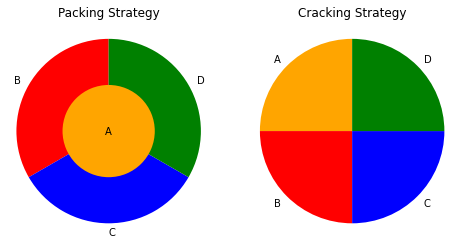

In [17]:
import matplotlib.pyplot as plt

# Define the data for the first pie chart
labels1 = ['B', 'C', 'D']
sizes1 = [33, 33, 33]
colors1 = ['red', 'blue', 'green']

# Define the data for the second pie chart
labels2 = ['A']
sizes2 = [100]
colors2 = ['orange']

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart
ax1.pie(sizes1, labels=labels1, colors=colors1, startangle=90)

# Create the second pie chart
ax1.pie(sizes2, colors=colors2, radius=0.5, startangle=90)

# Add a central label to the second pie chart
ax1.text(0, 0, 'A', ha='center', va='center', fontsize=10)


labels3 = labels2 + labels1
sizes3 = [25,25,25,25]
colors3 = colors2 + colors1

# Create the first pie chart
ax2.pie(sizes3, labels=labels3, colors=colors3, startangle=90)

# Set the aspect ratio to be equal
ax1.axis('equal')
ax2.axis('equal')

# Add titles
ax1.set_title('Packing Strategy')
ax2.set_title('Cracking Strategy')

# Show the plot
plt.show()


## Example of cdf function

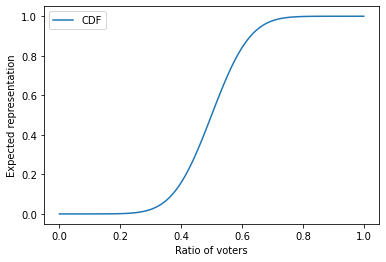

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a = 10
b = -5

# Cdf function
def f(x):
    return stats.norm.cdf(a*x+b)

# Generate x values
x = np.linspace(0, 1, 100)

# Plot the functions on the same axes
plt.plot(x, f(x), label='CDF')

# Label the axes
plt.xlabel('Ratio of voters')
plt.ylabel('Expected representation')

# Add legend
plt.legend()

# Display the plot
plt.show()


## Given some values of a, n, and bvap_total
We make a plot of the ratio of expected representatives for each strategy given the number of black voters that you can pack into district A

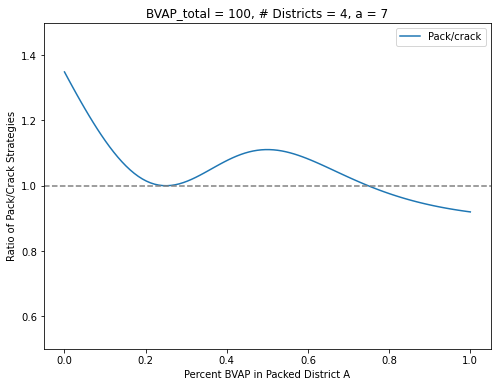

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

n = 4  # number of districts
bvap_total = 100  # bvap_total
a = 7
# Define the probability of electing a representative
def f(a, x):
    b = -a / 3
    return stats.norm.cdf(a * x + b)

# Define the expected representation for packing
def expectation_packing(a, x):
    bvap_in_B = (bvap_total - x * 100) / (n - 1)
    return f(a, x) + (n - 1) * f(a, bvap_in_B / 100)

# Define the expected representation for cracking
def expectation_cracking(a, x):
    bvap_in_each_district = bvap_total / n
    return 0 * x + n * f(a, bvap_in_each_district / 100)

# Define the ratio of pack/crack strategies
def r(a, x):
    return expectation_packing(a, x) / expectation_cracking(a, x)

# Generate x values
x = np.linspace(0, 1, 100)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ratio of pack/crack strategies
ax.plot(x, r(a, x), label='Pack/crack')

# Plot a horizontal line at y=1
ax.axhline(y=1, color='gray', linestyle='--')

# Set the axis labels and title
ax.set_xlabel('Percent BVAP in Packed District A')
ax.set_ylabel('Ratio of Pack/Crack Strategies')
ax.set_title(f'BVAP_total = {bvap_total}, # Districts = {n}, a = {a}')

# Add a legend
ax.legend()

# Set the y-axis limits
ax.set_ylim(0.5, 1.5)

# Display the plot
plt.show()


The plot shows that if your demographics are set up such that 50% of your voters are black in district A, then you should choose the packing strategy.

On the other hand, if 90% of your voters are in district A are black, then you should try the cracking strategy.




## Varying BVAP_total and Probability function value a
Now we can ask what happens as we vary the total number of black voters and also the coefficients of the probability distribution.

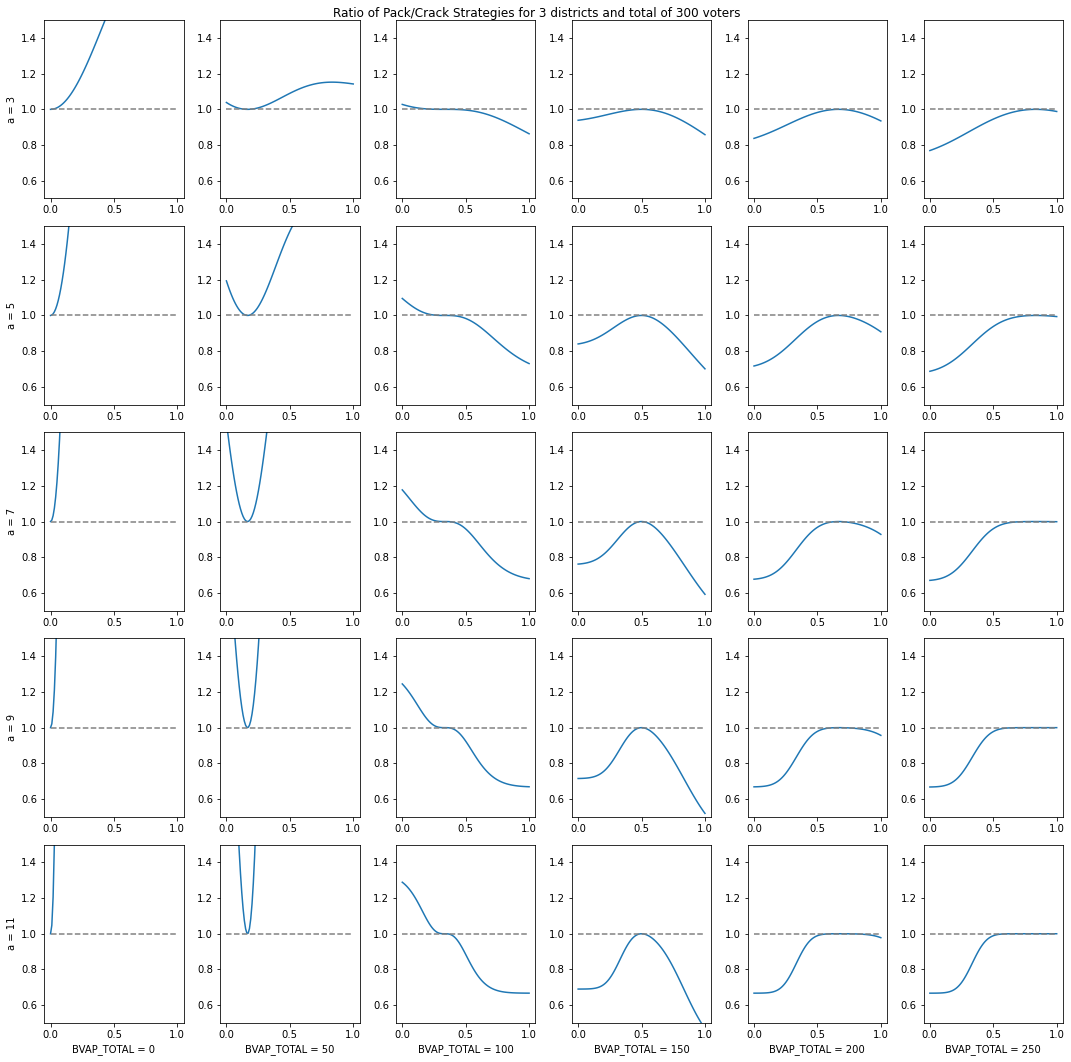

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
n = 3 # number of districts

# let's assume there are 100 voters in each district, and all the population is voting population
# Thus, if n=3, then there are 300 voters.


bvap_totals = np.arange(0, n*100, 50) 


fig, axs = plt.subplots(nrows=len(a_values), ncols=len(bvap_totals), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, bvap_total in enumerate(bvap_totals):
        def f(x):
            b = -a/3
            return stats.norm.cdf(a * x + b) # define the probability of electing a representative
        
        def expectation_packing(x):
            # x = bvap/vap in district A
            # total voters = 100*n
            # total voters not in district A = 100*(n-1)
            # total black voters not in district A = bvap_total - x*100
            # total black voters in district B = (bvap_total - x*100)/(n-1)
            bvap_in_B = (bvap_total - x*100)/(n-1)
            
            # ratio in district B is bvap_in_B/100
            
            return f(x) + (n - 1) * f(bvap_in_B/100)
        
        def expectation_cracking(x):
            # Each district gets the same number of black voters
            bvap_in_each_district = bvap_total/n
            return 0 * x + n * f(bvap_in_each_district/100)

        x = np.linspace(0, 1, 100)
        
        def r(x):
            return expectation_packing(x)/expectation_cracking(x)

        x = np.linspace(0, 1, 100)
        Y = [1 for i in x]
        axs[i, j].plot(x, r(x), label='Pack/crack')
        axs[i, j].plot(x, Y,  color='gray', linestyle='--')
   

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0.5, 1.5)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, bvap_total in enumerate(bvap_totals):
    axs[len(a_values)-1, j].set_xlabel(f'BVAP_TOTAL = {bvap_total}')

# Add a label to the full subplots
fig.suptitle(f'Ratio of Pack/Crack Strategies for {n} districts and total of {n*100} voters')


plt.tight_layout()
plt.show()

## Perturbations in demographics

The above plots are very special since the demographics are cleanly distributed.  

However, suppose that this is not the case.   Suppose that there is some small deviations in the number of black voters in the cracked districts.   This has an interesting effect on the plots.

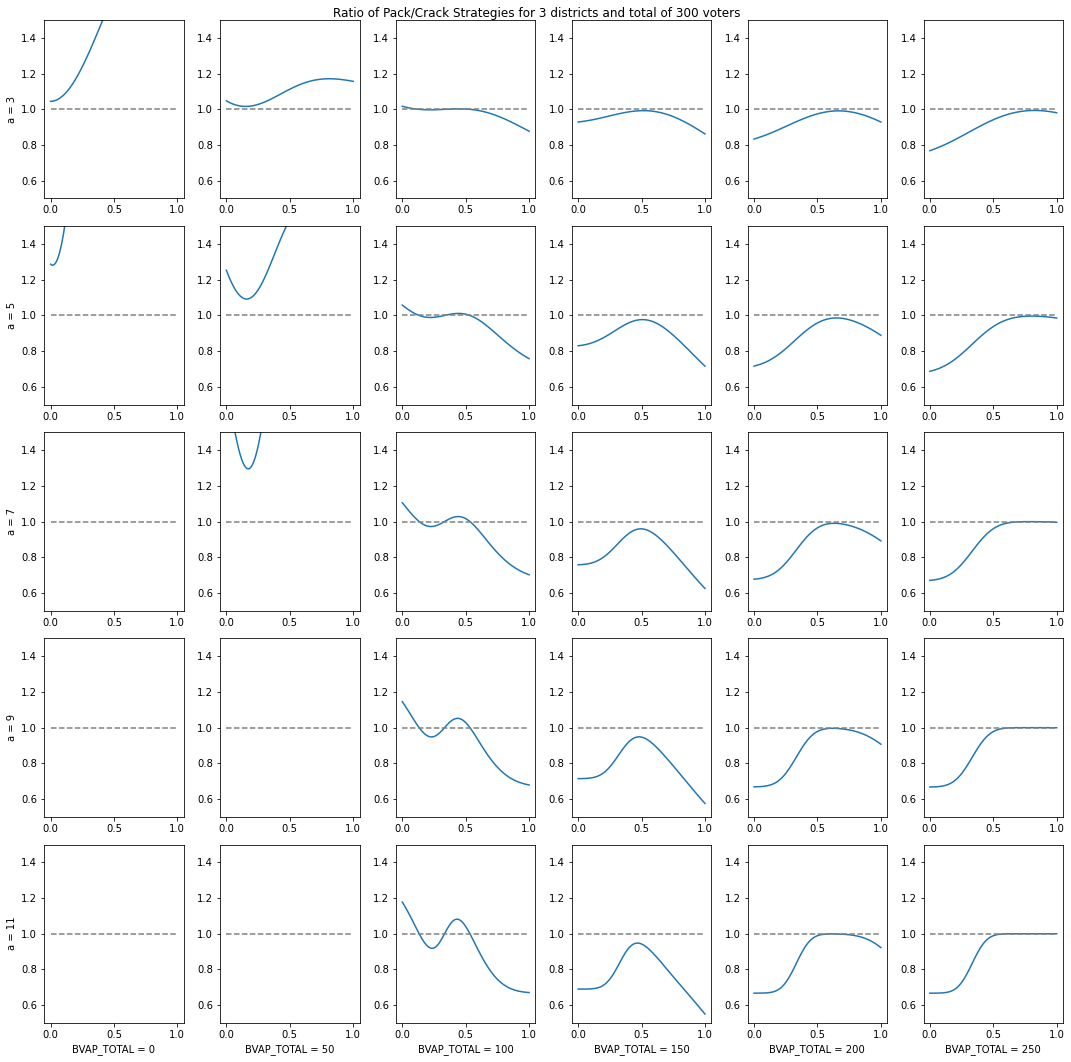

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
n = 3 # number of districts

# let's assume there are 100 voters in each district, and all the population is voting population
# Thus, if n=3, then there are 300 voters.


bvap_totals = np.arange(0, n*100, 50) 

D = 10 # total range of values

# Generate (n-1) equally spaced points between -D and D
Delta = np.linspace(-D, D, n-1)

# Subtract the mean value to make the points average to 0
Delta = Delta - np.mean(Delta)


fig, axs = plt.subplots(nrows=len(a_values), ncols=len(bvap_totals), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, bvap_total in enumerate(bvap_totals):
        def f(x):
            b = -a/3
            return stats.norm.cdf(a * x + b) # define the probability of electing a representative
        
        def expectation_packing(x):
            # x = bvap/vap in district A
            # total voters = 100*n
            # total voters not in district A = 100*(n-1)
            # total black voters not in district A = bvap_total - x*100
            # total black voters in district B = (bvap_total - x*100)/(n-1)
            bvaps_in_cracked = [(bvap_total - x*100)/(n-1) + d for d in Delta]
            
            return f(x) +  sum([f(bvap/100) for bvap in bvaps_in_cracked]) # THIS IS THE MAIN CHANGE!
        
        def expectation_cracking(x):
            # Each district gets the same number of black voters
            bvap_in_each_district = bvap_total/n
            return 0 * x + n * f(bvap_in_each_district/100)

        x = np.linspace(0, 1, 100)
        
        def r(x):
            return expectation_packing(x)/expectation_cracking(x)

        x = np.linspace(0, 1, 100)
        Y = [1 for i in x]
        axs[i, j].plot(x, r(x), label='Pack/crack')
        axs[i, j].plot(x, Y,  color='gray', linestyle='--')
   

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0.5, 1.5)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, bvap_total in enumerate(bvap_totals):
    axs[len(a_values)-1, j].set_xlabel(f'BVAP_TOTAL = {bvap_total}')

# Add a label to the full subplots
fig.suptitle(f'Ratio of Pack/Crack Strategies for {n} districts and total of {n*100} voters')


plt.tight_layout()
plt.show()